In [1]:
# Standard libs
import pandas as pd
import numpy as np

In [2]:
# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation

from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

# from sklearn.cross_validation import KFold

In [3]:
#visualisation
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

## Load the data

In [4]:
sales = pd.read_csv("./data/home_data.csv")

In [5]:
sales.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Plot size of living room vs price

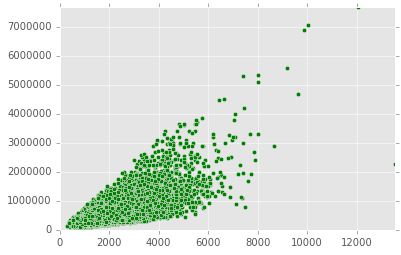

In [8]:
plt.axis([0,sales["sqft_living"].max(),0,sales["price"].max()])
plt.scatter(x=sales["sqft_living"], y=sales["price"], c="green");

# Alternatively can use:
# sales.plot.scatter(x="sqft_living", y="price")

## Regression model with one feature (sqft_living)

In [9]:
sqft_model = LinearRegression()

-  Create a Training and Test dataset
-  Then train the classifier on Training dataset
-  Finally get a score on the test set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(sales["sqft_living"],sales["price"],
                                                    test_size = 0.2,random_state=0)

# X_train need to be reshaped as Vector for the fit() method -> reshape(-1,1)

sqft_model.fit(X_train.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Metrics & score

#### Metrics
-  Predict (on test dataset)
-  And calculate metric (here Mean Square Error or Residual Sum of Squares a.k.a RSS) on test dataset
-  Also calculate Root Mean Square Error a.k.a. RMSE, which is sqrt(RSS)

In [11]:
y_predict = sqft_model.predict(X_test.reshape(-1,1))
rss = mean_squared_error(y_test,y_predict,multioutput="uniform_average")
rmse = np.sqrt(rss)
print("RSS:",rss,"and RMSE:",rmse)

RSS: 61940787221.5 and RMSE: 248879.061436


Mean Square Error using **math** !

In [12]:
rss_math = (np.square(y_test - y_predict).sum())/y_test.count()
rmse_math = np.sqrt(rss_math)
print("Using math! RSS:",rss_math,"and RMSE:",rmse_math)

Using math! RSS: 61940787221.5 and RMSE: 248879.061436


#### Score
Score using the **score** method of the linear regression class

In [13]:
score = sqft_model.score(X_test.reshape(-1,1),y_test)
print("Score:",score)

Score: 0.479157707997


Score using **math** !

The score() method of Linear Regression model return the R2 coefficient of determination:

In [14]:
score_math = 1 - (np.square(y_test - y_predict).sum())/(np.square(y_test - y_test.mean()).sum())
print("Score using math:",score_math)

Score using math: 0.47915770799655055


## Print our linear regression

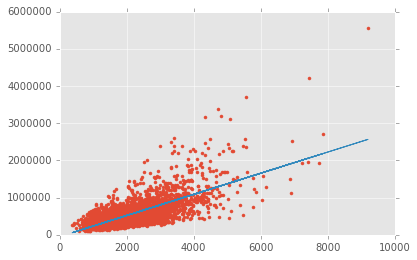

In [15]:
plt.plot(X_test,y_test,".",X_test,y_predict,"-");

### Parameters of our linear regression

In [16]:
w0 = sqft_model.intercept_
w1 = sqft_model.coef_
print("w0:",w0,"and w1:",w1)

w0: -48257.0634556 and w1: [ 283.96855737]


## Exploring additional features

In [17]:
features = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","zipcode"]
sales[features].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,98077.939805
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,53.505026
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,98001.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,98033.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,98065.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,98118.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,98199.000000


### Boxplot zipcode & price
The easy peasy way:

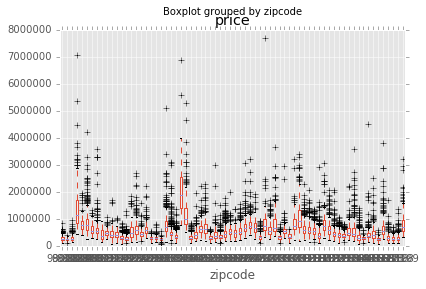

In [18]:
sales.boxplot("price",by="zipcode");

### Boxplot zipcode & price
The "allowing more control" way:

In [19]:
data = sales[["price","zipcode"]]
data = data.groupby("zipcode")

dataplot is a list containing lists of prices for each zipcode

labelplot is a list containing the zipcodes

In [20]:
dataplot = []
labelplot = []
for name, group in data:
        dataplot.append(group["price"])
        labelplot.append(name)

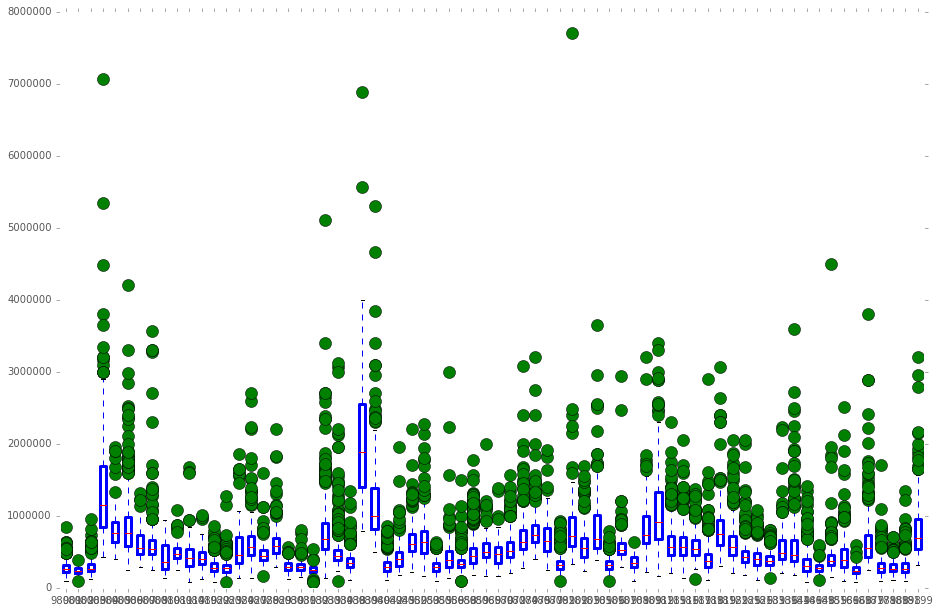

In [21]:
plt.axes([1,1,2,2],axisbg="w")
boxprops = dict(linestyle='-', linewidth=3, color='blue')
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')
plt.boxplot(dataplot,labels=labelplot, boxprops=boxprops, flierprops=flierprops);

## Regression model with several features

In [22]:
multi_feature_model = LinearRegression()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(sales[features],sales["price"],
                                                    test_size = 0.2,random_state=0)

multi_feature_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Metrics (RSS and RMSE)

In [24]:
y_predict = multi_feature_model.predict(X_test)
rss_multi_feat = mean_squared_error(y_test,y_predict,multioutput="uniform_average")
rmse_multi_feat = np.sqrt(rss_multi_feat)
print("RSS:",rss_multi_feat,"and RMSE:",rmse_multi_feat)
print("To be compared with RSS/RMSE single feature. RSS:",rss,"RMSE:",rmse)

RSS: 59538329945.1 and RMSE: 244004.774431
To be compared with RSS/RMSE single feature. RSS: 61940787221.5 RMSE: 248879.061436


## Predictions on houses
### House 1

In [25]:
house1 = sales[sales["id"]==5309101200]

In [26]:
print("House 1 price:",house1["price"])
house1_predict = sqft_model.predict(house1["sqft_living"].reshape(-1,1))
print("House 1 price prediction:",house1_predict)
house1_multi_feat_predict = multi_feature_model.predict(house1[features])
print("House 1 price prediction for multi features model:",house1_multi_feat_predict)

House 1 price: 1054    620000
Name: price, dtype: int64
House 1 price prediction: [ 633267.47422744]
House 1 price prediction for multi features model: [ 637556.26515923]


### House 2

In [27]:
house2 = sales[sales["id"]==1925069082]

In [28]:
print("House 2 price:",house2["price"])
house2_predict = sqft_model.predict(house2["sqft_living"].reshape(-1,1))
print("House 2 price prediction:",house2_predict)
house2_multi_feat_predict = multi_feature_model.predict(house2[features])
print("House 2 price prediction for multi features model:",house2_multi_feat_predict)

House 2 price: 1361    2200000
Name: price, dtype: int64
House 2 price prediction: [ 1269357.04273158]
House 2 price prediction for multi features model: [ 1274443.76531341]


### Bill Gates' house

In [29]:
bill_gates = pd.DataFrame({'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]})

In [30]:
bill_gates_predict = sqft_model.predict(bill_gates["sqft_living"].reshape(-1,1))
print("Bill Gates' house price prediction:",bill_gates_predict)
bill_gates_multi_feat_predict = multi_feature_model.predict(bill_gates[features])
print("Bill Gates' house price prediction for multi features model:",bill_gates_multi_feat_predict)

Bill Gates' house price prediction: [ 14150170.80494038]
Bill Gates' house price prediction for multi features model: [ 15796988.23574001]
